# PyTorch 基础知识

In [1]:
import torch 
import torch.nn as nn 
import torchvision

D:\anaconda3\envs\pytracking\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# print(torch.__version__)
# print(torch.version.cuda)
# print(torch.backends.cudnn.version())
print(torch.cuda.get_device_name(0))

NVIDIA GeForce GTX 1050 Ti


In [6]:
# 可复现性
import numpy as np 
import random

# random.seed(0)
# np.random.seed(0)
# torch.manual_seed(0)
# torch.cuda.manual_seed(0)
# 42

In [13]:
np.random.seed(0) 
a = np.random.randn(1)
print(a)

[1.76405235]


In [14]:
import torch
torch.cuda.is_available()

True

In [12]:
import os
os.environ['CUDA_VISBLE_DEVICES'] = '1' # 命令行指定gpu device: CUDA_VISBLE_DEVICES=0,1 python *.py

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

tensor = torch.randn(3) 
# print(tensor)
tensor = tensor.to(device)
print(tensor)
# print(tensor.cuda()) # .cpu ()

tensor([ 1.1799,  0.3567, -0.9931], device='cuda:0')


In [29]:
del tensor
# torch.cuda.empty_cache()

In [23]:
# 张量处理 
tensor = torch.randn(2, 3, 4)#(1,3,224, 224) # 1, 1024, 14, 14 
# print(tensor)
print(tensor.type()) 
tensor = tensor.int() 
print(tensor.type()) 

# print(tensor.float().type()) # float()
print(tensor.shape) #size() 
print(tensor.dim()) 

torch.FloatTensor
torch.IntTensor
torch.Size([2, 3, 4])
3


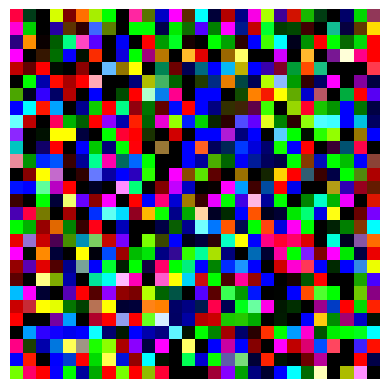

In [24]:
# python image libirary PIL<-->numpy<-->torch Image:[0,1] float <--> [0,255] int

import PIL 
import matplotlib.pyplot as plt
import cv2 
import numpy as np
import torch

tensor = torch.randn(3,28,28)

tensor = tensor.cuda()
ndarray = tensor.cpu().numpy()
# print(ndarray)
tensor = torch.from_numpy(ndarray) # b c h w  256 3 244 244 --> 256 10 
 
# [H W 3]-->[3 H W] # unsqueeze(0) [1, 3, H, W]
image = PIL.Image.fromarray(torch.clamp(tensor*255, min=0, max=255).byte().permute(1,2,0).cpu().numpy())
# image1 = torchvision.transforms.functional.to_pil_image(tensor) #与上面等价

# image.show()

plt.figure()
plt.axis('off')
plt.imshow(image)
plt.show()

# cv2.imshow('im', np.asarray(image))
# key = cv2.waitKey(0)
# cv2.destroyAllWindows()

In [15]:
import torchvision
tensor = torch.from_numpy(np.asarray(IL.ImagPe.open('img/fig.jpg'))).permute(2,0,1).float()/255
# print(tensor)
tensor1 = torchvision.transforms.functional.to_tensor(PIL.Image.open('img/fig.jpg'))
# print(tensor1) 

In [9]:
torch.manual_seed(0)
print(torch.rand(1))
torch.manual_seed(0)
print(torch.rand(1).item())

tensor([0.4963])
0.49625658988952637


In [2]:
# view/reshape 和 shape/size对比
tensor = torch.rand(2,3,4)
tensor = torch.reshape(tensor, (6,4)) 
tensor1 = tensor.view(6,4) 
tensor = torch.rand(64,512)
print(tensor.shape)
print(tensor.shape[0])

print(tensor.size())
print(tensor.size(0))

print(tensor1.size())

torch.Size([64, 512])
64
torch.Size([64, 512])
64
torch.Size([6, 4])


In [19]:
tensor = torch.Tensor([[1,2,7],[3,4,8], [5, 6, 9]])
print(tensor)
# tensor1 = torch.randperm(tensor.size(0))
tensor1 = torch.tensor([[1,2,7],[3,4,8], [5, 6, 9]])
print(tensor1.type())
# print(tensor1) #permute
# tensor = tensor[torch.randperm(tensor.size(0))] # tensor[:, torch.randperm(tensor.size(1))] 
# print(tensor)

tensor([[1., 2., 7.],
        [3., 4., 8.],
        [5., 6., 9.]])
torch.LongTensor


In [7]:
# 翻转
# narray = tensor.numpy()
# print(narray)
# narray = narray[::-1, :]
# print(narray)

# tensor = torch.Tensor([[1,2,7],[3,4,8], [5, 6, 9]])

print(tensor.flip(dims=(1,)))
range(6,-1, -1) #step 6 5   0
0 6  6 5 4 3 2 1
# print(torch.arange(tensor.size(0)-1, -1, -1))
# tensor = tensor[torch.arange(tensor.size(0)-1, -1, -1), :]
# print(tensor)

[[1. 2. 7.]
 [3. 4. 8.]
 [5. 6. 9.]]
[[5. 6. 9.]
 [3. 4. 8.]
 [1. 2. 7.]]


In [27]:
tensor = torch.Tensor([1,2]) 
tensor1 = tensor#.clone() #import copy copy.deepcopy()
tensor1[1]=3
print(tensor)
print(tensor1)

# print(tensor.detach())
# tensor.detach().clone()

tensor([1., 3.])
tensor([1., 3.])


In [12]:
tensor1 = torch.rand(2,3,4)
tensor2 = torch.rand(2,3,4)
tensor_cat = torch.cat([tensor1, tensor2],dim=0)
print(tensor_cat.shape)
tensor_stack = torch.stack([tensor1, tensor2], dim=0) # 2 2 3 4 .reshape(*tensor_stack.shape[-2:])
# print(tensor_stack.shape)  
print(*tensor_stack.shape[-2:])
# print(tensor_stack.reshape(-1, *tensor_stack.shape[-2:]).shape)

torch.Size([4, 3, 4])
3 4


In [28]:
tensor = torch.randn(23,28,28) # 32 1 28 28
index=torch.unsqueeze(tensor, dim=1) # b c h w
print(index.shape)
print(torch.squeeze(index).shape)

torch.Size([23, 1, 28, 28])
torch.Size([23, 28, 28])


In [31]:
import numpy as np
n = np.array([[2,3],[4,5]])
# n = n[::-1] #:: ... None
n1 = n[...,None]
print(n1.shape) 

(2, 2, 1)


In [27]:
tensor = torch.Tensor([0,1,4,0,6,0])
print(tensor[torch.nonzero(tensor)]) # tensor[:]
print(torch.nonzero(tensor==0))

tensor([[1.],
        [4.],
        [6.]])
tensor([[0],
        [3],
        [5]])


In [28]:
# 矩阵乘法 
import numpy as np  #元素乘 点乘  [2, 3] [4, 2] 8 6
feat = torch.randn(1,3,5,5) 
k = torch.randn(1,3,1,1) 
k_1 = k.expand(1,3,5,5)
# print(k_1
print((feat * k_1 == feat * k).all()) # any()
# print(torch.equal(feat * k_1,feat * k))

tensor(True)


In [89]:
tensor1 = torch.Tensor([[1,2],[3,4]])
tensor2 = torch.Tensor([[2,2],[5,1]]) 
print(torch.mm(tensor1, tensor2))
# print(tensor1.matmul(tensor2))
# print(torch.bmm(tensor1.unsqueeze(0), tensor2.unsqueeze(0)))

print(tensor1*tensor2) 

tensor([[12.,  4.],
        [26., 10.]])
tensor([[ 2.,  4.],
        [15.,  4.]])


# PyTorch搭建网络

In [3]:
# 注意力网络
# Squeeze-and-Excitation Networks， which is a channel attention block.
class SE_Block(nn.Module):
    def __init__(self, ch_in, reduction=16):
        super(SE_Block, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(ch_in, ch_in // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(ch_in // reduction, ch_in, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)  # squeeze operation
        y = self.fc(y).view(b, c, 1, 1)  # FC obtains channel attention weight
        return x * y.expand_as(x)


# CBAM: Convolutional Block Attention Module
# channel and spatial attention
class CBAM(nn.Module):
    def __init__(self, in_channel, ratio=16):
        super(CBAM, self).__init__()
        # channel attention
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1)) 
        self.max_pool = nn.AdaptiveMaxPool2d((1, 1))
        self.fc = nn.Sequential(
            nn.Conv2d(in_channel, in_channel // ratio, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channel // ratio, in_channel, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

        # spatial attention
        self.conv = nn.Conv2d(2, 1, kernel_size=7, padding=3, bias=False)

    def forward(self, x):
        # b, c, w, h = x.size()
        # channel attention
        avg_fc = self.fc(self.avg_pool(x))
        max_fc = self.fc(self.max_pool(x))
        c_out = self.sigmoid(avg_fc + max_fc)
        x_c = x * c_out

        # spatial attention
        x_mean = torch.mean(x, dim=1, keepdim=True) 
        x_max, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([x_mean, x_max], dim=1)
        x_s = self.sigmoid(self.conv(x_cat))
        out = x_c * x_s

        return out

In [8]:
feat = torch.randn(1,16,28,28) # b c h w

se = SE_Block(16)
# print(se)
# print(sum(p.numel() for p in se.parameters()))
# print("Number of total parameter: %.4fM" % (sum(p.numel() for p in se.parameters()) / 1e6))
feat_att = se(feat)
print(feat_att.shape)
# cbam = CBAM(16)
# print(cbam)
# print("Number of total parameter: %.4fM" % (sum(p.numel() for p in cbam.parameters()) / 1e6))
# feat_att = cbam(feat)
# print(feat_att.shape)

torch.Size([1, 16, 28, 28])


In [22]:
# convolutional neural network (2 convolutional layers)
import math

class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.se_att = CBAM(16)
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.se_att1 = SE_Block(32)
        
        self.fc = nn.Linear(7*7*32, num_classes)
        
        # Init weights  xaiver
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
                if m.bias is not None:
                    m.bias.data.zero_()
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def forward(self, x):
        out = self.layer1(x)
#         out = self.se_att(out)
        out = self.layer2(out)
#         out = self.se_att1(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [23]:
import time

tic = time.time()
cnn = ConvNet()
print("Number of total parameter: %.4f" % (sum(p.numel() for p in cnn.parameters())))# / 1e6))
# print(cnn)
img = torch.randn(1,1,28,28)
feat = cnn(img)
toc = time.time()-tic
print(toc)
# print(feat.shape) # latency

Number of total parameter: 20844.0000
0.34579014778137207


In [34]:
model = ConvNet()

# Common practise for initialization.
for layer in model.modules():
    if isinstance(layer, torch.nn.Conv2d):
        torch.nn.init.kaiming_normal_(layer.weight, mode='fan_out',
                                      nonlinearity='relu')
        if layer.bias is not None:
            torch.nn.init.constant_(layer.bias, val=0.0)
    elif isinstance(layer, torch.nn.BatchNorm2d):
        torch.nn.init.constant_(layer.weight, val=1.0)
        torch.nn.init.constant_(layer.bias, val=0.0)
    elif isinstance(layer, torch.nn.Linear):
        torch.nn.init.xavier_normal_(layer.weight)
        if layer.bias is not None:
            torch.nn.init.constant_(layer.bias, val=0.0)

# Initialization with given tensor. 
tensor = torch.Tensor([2,3])
layer.weight = torch.nn.Parameter(tensor)
layer.weight
# layer.weight #迁移模型
#   for p in self.feature_extractor.parameters():
layer.weight.requires_grad_(False)

Parameter containing:
tensor([2., 3.])

In [ ]:
model = ConvNet()
model.load_state_dict(torch.load('*.pth.tar')) # map_location='cpu', strict=False

# model_new代表新的模型
# model_saved代表其他模型，比如用torch.load导入的已保存的模型
model_new_dict = model_new.state_dict()
model_common_dict = {k:v for k, v in model_saved.items() if k in model_new_dict.keys()}
model_new_dict.update(model_common_dict)
model_new.load_state_dict(model_new_dict)

In [ ]:
# 训练之前的数据处理 #numpy() RGB 0-1 0 255
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(size=224),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), #imagenet
                                     std=(0.229, 0.224, 0.225)),
 ])
 val_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                     std=(0.229, 0.224, 0.225)),
])

In [ ]:
import matplotlib.pyplot as plt
import torchvision

from PIL import Image

img = Image.open('img/fig.jpg')
print(img.size)
img1 = torchvision.transforms.RandomResizedCrop(size=224)(img)
img2 = torchvision.transforms.RandomHorizontalFlip()(img)
img3 = torchvision.transforms.Resize(256)(img)
img4 = torchvision.transforms.CenterCrop(224)(img)
print(img1.size)
plt.subplot(2,3,1)
plt.imshow(img)
# # plt.title("原图")
# plt.subplot(2,3,2)
# plt.imshow(img1)
plt.subplot(2,3,3)
plt.imshow(img2)
# plt.subplot(2,3,4)
# plt.imshow(img3)
# plt.subplot(2,3,5)
# plt.imshow(img4)
plt.show()

(576, 432)
(224, 224)


In [37]:
model = ConvNet()

# Loss and optimizer
criterion = nn.CrossEntropyLoss() #MyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, weight_decay=1e-4)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i ,(images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print('Epoch: [{}/{}], Step: [{}/{}], Loss: {}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

NameError: name 'train_loader' is not defined

In [ ]:
model.train() # required_grad = True
# Test the model
model.eval()  # eval mode(batch norm uses moving mean/variance instead of mini-batch mean/variance) dropout
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item() #  0 1  1 0 

    print('Test accuracy of the model on the 10000 test images: {} %'
          .format(100 * correct / total))

In [ ]:
class MyLoss(torch.nn.Moudle): # mse
    def __init__(self):
        super(MyLoss, self).__init__()

    def forward(self, x, y):
        loss = torch.mean((x - y) ** 2)
        return loss

In [ ]:
# 梯度裁剪（gradient clipping）
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=20)

In [ ]:
# Reduce learning rate when validation accuarcy plateau.
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=5, verbose=True)
for t in range(0, 80):
    train(...)
    val(...) 
    scheduler.step(val_acc)

# Cosine annealing learning rate.
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=80)
# Reduce learning rate by 10 at given epochs.
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[50, 70], gamma=0.1)
for t in range(0, 80):
    scheduler.step()    
    train(...)
    val(...)

# Learning rate warmup by 10 epochs.
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda t: t / 10)
for t in range(0, 10):
    scheduler.step()
    train(...)
    val(...)

In [38]:
# 从1.4版本开始，torch.optim.lr_scheduler 支持链式更新（chaining），即用户可以定义两个 schedulers，并交替在训练中使用。
import torch
from torch.optim import SGD
from torch.optim.lr_scheduler import ExponentialLR, StepLR
model = [torch.nn.Parameter(torch.randn(2, 2, requires_grad=True))]
optimizer = SGD(model, 0.1)
scheduler1 = ExponentialLR(optimizer, gamma=0.9)
scheduler2 = StepLR(optimizer, step_size=3, gamma=0.1)
for epoch in range(4):
    print(epoch, scheduler2.get_last_lr()[0])
    optimizer.step()
    scheduler1.step()
    scheduler2.step()

0 0.1
1 0.09000000000000001
2 0.08100000000000002
3 0.007290000000000002


In [ ]:
# 模型训练可视化
# pip install tensorboard
# tensorboard --logdir=runs

In [9]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter()

for n_iter in range(100): 
    writer.add_scalar('Loss/train', n_iter, n_iter) # np.random.random()
    writer.add_scalar('Loss/test', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/train', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/test', np.random.random(), n_iter)

In [41]:
from PIL import Image
import collections
# ResNet GAP feature.
model = torchvision.models.resnet18(pretrained=True)
# print(model)
model = torch.nn.Sequential(collections.OrderedDict(
    list(model.named_children())[:-3]))
# print(model)

img = Image.open('img/fig.jpg')
transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(size=224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                     std=(0.229, 0.224, 0.225)),
 ])
img = transform(img)
with torch.no_grad():
    model.eval()
    feat = model(img.unsqueeze(0))
    print(feat.shape)

torch.Size([1, 1000])


In [161]:
# 微调全连接层
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
model.fc = nn.Linear(512, 100)  # Replace the last fc layer

# 以较大学习率微调全连接层，较小学习率微调卷积层
finetuned_parameters = list(map(id, model.fc.parameters()))
conv_parameters = (p for p in model.parameters() if id(p) not in finetuned_parameters)
parameters = [{'params': conv_parameters, 'lr': 1e-3}, 
              {'params': model.fc.parameters()}]
optimizer = torch.optim.SGD(parameters, lr=1e-2, momentum=0.9, weight_decay=1e-4)

Minist for a example

In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import os
import cv2
import math

In [2]:
torch.manual_seed(1)  # 使用随机化种子使神经网络的初始化每次都相同

# 超参数
EPOCH = 1  # 训练整批数据的次数
BATCH_SIZE = 20 # 10 20 30, 8 16 32 64 
LR = 0.001  # 学习率 

In [5]:
# 下载mnist手写数据集
train_data = torchvision.datasets.MNIST(
    root='./data/',  # 保存或提取的位置  会放在当前文件夹中
    train=True,  # true说明是用于训练的数据，false说明是用于测试的数据
    transform=torchvision.transforms.ToTensor(),  # 转换PIL.Image or numpy.ndarray
    download=True,
)
print(train_data)

Using downloaded and verified file: ./data/MNIST\raw\train-images-idx3-ubyte.gz
Extracting ./data/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\raw
Using downloaded and verified file: ./data/MNIST\raw\train-labels-idx1-ubyte.gz
Extracting ./data/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\raw


0it [00:00, ?it/s]

Extracting ./data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\raw


0it [00:00, ?it/s]

Extracting ./data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\raw
Processing...


D:\anaconda3\envs\pytracking\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [6]:
test_data = torchvision.datasets.MNIST(
    root='./data/',
    train=False  # 表明是测试集
)
print(test_data)
print(test_data.train_data[:2].shape)
print(torch.unsqueeze(test_data.train_data, dim=1).shape)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
torch.Size([2, 28, 28])
torch.Size([10000, 1, 28, 28])


D:\anaconda3\envs\pytracking\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [7]:
# Test 
# torch.unsqueeze(a) 是用来对数据维度进行扩充，这样shape就从(20,28,28)->(20,1,28,28) 
# 图像的pixel本来是0到255之间，除以255对图像进行归一化使取值范围在(0,1)
test_x = torch.unsqueeze(test_data.train_data, dim=1).type(torch.FloatTensor)[:20] / 255 
test_y = test_data.test_labels[:20]  # b, c h w 0-255 int  0-1

D:\anaconda3\envs\pytracking\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [8]:
# 批训练 20个samples，1 channel，28x28 (20,1,28,28)
# Torch中的DataLoader是用来包装数据的工具，它能帮我们有效迭代数据，这样就可以进行批训练 iter
train_loader = Data.DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True  #  训练时，为True
)

In [13]:
def conv_bn_relu(in_channels, out_channels, kernel_size=3, stride=1, padding=1, dilation=1, bias=False):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride,
                  padding=padding, dilation=dilation, bias=bias), # padding = (kernel_size-1)/2
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True))
    

# 简单的CNN (两层卷积层+全连接层)继承nn.Module这个模块
class CNN(nn.Module):  
    def __init__(self):
#         super(CNN, self).__init__()
        super().__init__()
        # Conv2d->BN->ReLU
        self.conv1 = conv_bn_relu(1, 16)   # 5, 1, 2 
        self.pooling = nn.MaxPool2d(kernel_size=2)
        self.conv2 = conv_bn_relu(16, 32)
        # 建立全卷积连接层
        self.fc = nn.Linear(32 * 7 * 7, 10)  # 输出是10个类 

        # Init weights 
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
                if m.bias is not None:
                    m.bias.data.zero_()
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
                
    def forward(self, x): # y = f(x)
        x = self.pooling(self.conv1(x))  
        x = self.pooling(self.conv2(x))

        # 把每一个批次的每一个输入都拉成一个维度，即(batch_size,32*7*7)
        # 因为pytorch里特征的形式是[bs,channel,h,w]，所以x.size(0)就是batchsize
        x = x.reshape(x.size(0), -1) #reshape view
        output = self.fc(x) 
        return output # 32 * 10

In [14]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


In [16]:
def cnn_paras_count(net):
    """cnn参数量统计"""
    # Find total parameters and trainable parameters
    total_params = sum(p.numel() for p in net.parameters())
    print("Number of total parameter: %.2fM" % (total_params / 1e6))
    total_trainable_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
    print("Number of trainable parameter: %.2fM" % (total_trainable_params / 1e6))

In [17]:
cnn_paras_count(cnn) 

Number of total parameter: 0.02M
Number of trainable parameter: 0.02M


In [18]:
# 优化器选择Adam
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR) #SGD adam adamW 
# 损失函数 
loss_func = nn.CrossEntropyLoss()  # 目标标签是one-hotted 0, 1 , 2  0.1, 0.2, 0.6

In [20]:
test_output = cnn(test_x)
# print(test_output.shape)
# print(torch.max(test_output, 1))
# print(torch.max(test_output, 1)[1])
pred_y = torch.max(test_output, 1)[1].numpy()
pred_y

array([4, 5, 8, 8, 5, 8, 4, 0, 5, 8, 5, 4, 5, 5, 4, 0, 3, 8, 0, 4],
      dtype=int64)

In [21]:
#traing
# 把x和y 都放入Variable中，然后放入cnn中计算output，最后再计算误差
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):  # 分配batch data
        output = cnn(b_x)  # 先将数据放到cnn中计算output
        loss = loss_func(output, b_y)  # 输出和真实标签的loss，二者位置不可颠倒
        optimizer.zero_grad()  # 清除之前学到的梯度的参数
        loss.backward()  # 反向传播，计算梯度
        optimizer.step()  # 应用梯度
            
        if step % 100 == 0:
            test_output = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).sum() / test_y.size(0))
            print('Epoch: ', epoch+1, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

torch.save(cnn.state_dict(), 'cnn.pkl')#保存模型

Epoch:  1 | train loss: 2.6432 | test accuracy: 0.00
Epoch:  1 | train loss: 0.2416 | test accuracy: 0.95
Epoch:  1 | train loss: 0.2677 | test accuracy: 1.00
Epoch:  1 | train loss: 0.1221 | test accuracy: 0.95
Epoch:  1 | train loss: 0.1004 | test accuracy: 0.90
Epoch:  1 | train loss: 0.0472 | test accuracy: 0.90
Epoch:  1 | train loss: 0.1938 | test accuracy: 1.00
Epoch:  1 | train loss: 0.1032 | test accuracy: 0.95
Epoch:  1 | train loss: 0.1966 | test accuracy: 0.90
Epoch:  1 | train loss: 0.0554 | test accuracy: 0.95
Epoch:  1 | train loss: 0.1460 | test accuracy: 1.00
Epoch:  1 | train loss: 0.3187 | test accuracy: 0.95
Epoch:  1 | train loss: 0.0110 | test accuracy: 1.00
Epoch:  1 | train loss: 0.1113 | test accuracy: 0.95
Epoch:  1 | train loss: 0.6403 | test accuracy: 1.00
Epoch:  1 | train loss: 0.0136 | test accuracy: 1.00
Epoch:  1 | train loss: 0.1413 | test accuracy: 0.95
Epoch:  1 | train loss: 0.1351 | test accuracy: 0.95
Epoch:  1 | train loss: 0.0055 | test accuracy

In [22]:
# 加载模型，调用时需将前面训练及保存模型的代码注释掉，否则会再训练一遍
cnn.load_state_dict(torch.load('cnn.pkl'))
cnn.eval()

# print 10 predictions from test data
inputs = test_x[:20]  # 测试32个数据
test_output = cnn(inputs)
pred_y = torch.max(test_output, 1)[1].data.numpy()
print('prediction number:',pred_y)  # 打印识别后的数字
print('real number:', test_y[:20].numpy()) # 90%

prediction number: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4]
real number: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [23]:
print(inputs.shape)
img = torchvision.utils.make_grid(inputs, padding=2)
print(img.shape)
img = img.numpy().transpose(1, 2, 0)

cv2.imshow('win', img)  # opencv显示需要识别的数据图片
key = cv2.waitKey(0)
cv2.destroyAllWindows()

torch.Size([20, 1, 28, 28])
torch.Size([3, 92, 242])


In [14]:
# http://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# 数据增强

In [28]:
from PIL import Image
from torchvision import transforms

In [44]:
img = Image.open('waste3.jpg')

In [37]:
img = transforms.CenterCrop((512, 512)).forward(img)
img.show()

In [39]:
img = transforms.RandomCrop((512, 512)).forward(img)
img.show()

In [41]:
img = transforms.RandomHorizontalFlip(p=0.999999).forward(img)
img.show()

In [43]:
img = transforms.RandomVerticalFlip(p=0.999999).forward(img)
img.show()

In [45]:
img = transforms.RandomRotation(30).forward(img)
img.show()

In [30]:
img = transforms.GaussianBlur(3).forward(img)
img.show()